In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

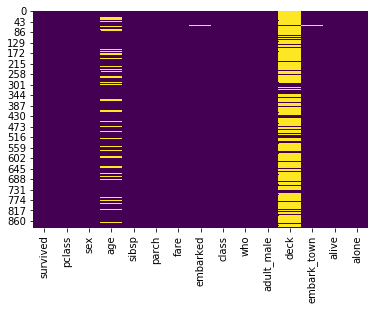

In [16]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [17]:
titanic[titanic['pclass']==1]['age'].mean()

38.233440860215055

In [18]:
titanic[titanic['pclass']==2]['age'].mean()

29.87763005780347

In [19]:
titanic[titanic['pclass']==3]['age'].mean()

25.14061971830986

In [23]:
def impute_age(cols):
    age=cols[0]
    pclass=cols[1]
    
    if pd.isnull(age):
        if pclass==1:
            return titanic[titanic['pclass']==1]['age'].mean()
        elif pclass==2:
            return titanic[titanic['pclass']==2]['age'].mean()
        elif pclass==3:
            return titanic[titanic['pclass']==3]['age'].mean()
    else:
        return age
    

In [24]:
titanic['age']=titanic[['age','pclass']].apply(impute_age, axis=1)

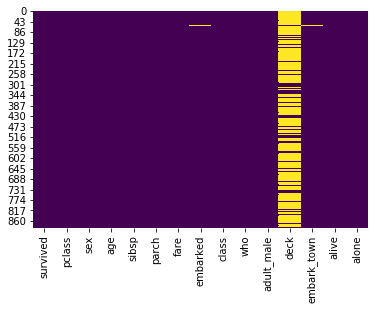

In [25]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [26]:
titanic['embarked'].isnull().sum()

2

In [27]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [28]:
common_value='S'
titanic['embarked'].fillna(common_value, inplace=True)

In [29]:
titanic['embarked'].isnull().sum()

0

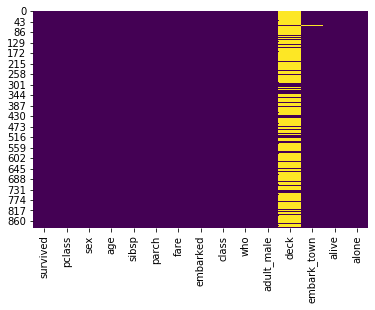

In [30]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [32]:
titanic.drop(labels=['deck','embark_town','alive'],inplace=True, axis=1)

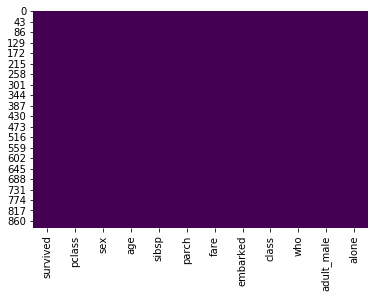

In [33]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='viridis')

In [35]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [36]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,25.140620,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.233441,1,0,71.2833,C,First,woman,False,False
2,1,3,female,25.140620,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,38.233441,1,0,53.1000,S,First,woman,False,False
4,0,3,male,25.140620,0,0,8.0500,S,Third,man,True,True


In [38]:
titanic['fare']=titanic['fare'].astype('int')
titanic['age']=titanic['age'].astype('int')
titanic['pclass']=titanic['pclass'].astype('int')

In [39]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int32   
 2   sex         891 non-null    object  
 3   age         891 non-null    int32   
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    int32   
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), int32(3), int64(3), object(3)
memory usage: 55.0+ KB


In [42]:
genders={'male':0,'female':1}
titanic['sex']=titanic['sex'].map(genders)

In [43]:
who={'man':0,'women':1,'chid':3}
titanic['who']=titanic['who'].map(who)

In [45]:
adult_male={True:1, False:0}
titanic['adult_male']=titanic['adult_male'].map(adult_male)

In [46]:
alone={True:1, False:0}
titanic['alone']=titanic['alone'].map(alone)

In [47]:
ports={'S':0,'C':1,'Q':2}
titanic['embarked']=titanic['embarked'].map(ports)

In [48]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,25,1,0,7,0,Third,0.0,1,0
1,1,1,1,38,1,0,71,1,First,NaN,0,0
2,1,3,1,25,0,0,7,0,Third,NaN,0,1
3,1,1,1,38,1,0,53,0,First,NaN,0,0
4,0,3,0,25,0,0,8,0,Third,0.0,1,1


In [50]:
titanic.drop(labels=['class','who'],axis=1,inplace=True)

In [51]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,25,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,25,0,0,7,0,0,1
3,1,1,1,38,1,0,53,0,0,0
4,0,3,0,25,0,0,8,0,1,1


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [57]:
X=titanic.drop(labels=['survived'],axis=1)
y=titanic['survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)

In [59]:
model=LogisticRegression(solver='lbfgs', max_iter=400)
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

In [60]:
model.score(X_test, y_test)

0.8203389830508474